In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
# Importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
#Importing dataset as dataframe
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])


(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [42]:
# 1st House Age
ha_list = df['HouseAge'].tolist()
ha_array = df['HouseAge'].values
ha_frame = df['HouseAge']

# Average rooms

ar_list = df['AveRooms'].tolist()
ar_array = df['AveRooms'].values
ar_frame = df['AveRooms']

# Covariance

Covariance - bu ko'variatsiya deb nomlanib, ,a'lumotlarning ikkita o'zgaruvchisi orasidagi assotsiyatsiyani yoki chiziqli bog'liqlikni anglatadi;



In [43]:
def calculate_covariance(ha_list, ar_list):
    if len(ha_list) != len(ar_list):
        raise ValueError("List X1 and X2 must have the same length")
    n = len(ha_list)
    mean_ha = sum(ha_list) / n
    mean_ar = sum(ar_list) / n

    covariance = sum((ha_list[i] - mean_ha) * (ar_list[i] - mean_ar) for i in range(n)) / n

    return covariance

calculate_covariance(ha_list, ar_list)

-4.772651208898194

# Correlation | Pears correlation
Corralation - ma'lumotning ikki o'zgaruvchisi orasidagi bog'liqlikning standartlashtirilgan ko'variatsiyasi

In [44]:
def calculate_correlation(X1, X2):
    if len(X1) != len(X2):
        raise ValueError("List X1 and X2 must have the same length")
    n = len(X1)
    mean_X1 = sum(X1) / n
    mean_X2 = sum(X2) / n
    # Calculating covariance by function
    cov = sum((X1[i] - mean_X1) * (X2[i] - mean_X2) for i in range (n)) / n
            
    #STD calculation
    std_X1 = (sum((xi - mean_X1) ** 2 for xi in X1) / n) ** 0.5
    std_X2 = (sum((xi - mean_X2) ** 2 for xi in X2) / n) ** 0.5

    #calculating correlation coefficient
    if std_X1 == 0 or std_X2 == 0:
          raise ValueError("Standart deviation cannot be zero for correlation calculation")

    correlation = cov / (std_X1 * std_X2)

    return correlation
calculate_correlation(ha_list, ar_list)

-0.15327742256198876

In [45]:
#dataframe
df[['HouseAge', 'AveRooms']].corr()

,HouseAge,AveRooms
HouseAge,1.000000,-0.153277
AveRooms,-0.153277,1.000000


PDF (Probability Density Function) - Continues
 

PDF value for the house age data: 
[0.01956981 0.02636506 0.00566125 ... 0.02066854 0.02217442 0.01914368]


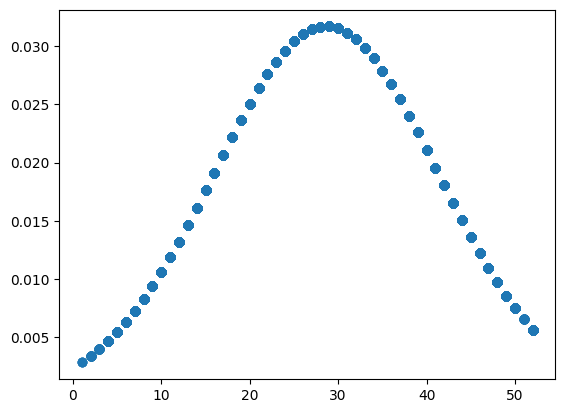

In [46]:
# Calculating pdf value . 1-st Mean value for dataset by numpy. Then std and precomposition coefficient
def calculate_pdf_vectorized(data):
    mu = np.mean(data)
    sigma = np.std(data, ddof=1)
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    
    #Compute the exponent part of all data points in one go
    exponent = np.exp(-((data - mu) ** 2) / (2 * sigma **2))

    # returning the array of computed PDF values
    return coeff * exponent 

#calculating the PDF value for all data points in the House age array
pdf_values = calculate_pdf_vectorized(ha_array)


#Result. Printing/ Visualizing
print('PDF value for the house age data: ')
print(pdf_values)
plt.scatter(ha_array, pdf_values)

# Scales and Normalizations

Min-Max scaling

In [59]:
def min_max(array):
    min_value = np.min(array)
    max_value = np.max(array)
    return (array-min_value)/(max_value-min_value)
res = min_max(ha_array)
print(res)

[0.78431373 0.39215686 1.         ... 0.31372549 0.33333333 0.29411765]
